In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


Importing the dataset into our notebook.

In [2]:
training_data = pd.read_csv("../input/titanic/train.csv")

In [3]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print('Number of passengers in the training dataset : ' + str(len(training_data)))

Number of passengers in the training dataset : 891


# Performing Exploratory Data Analysis on the dataset.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Graph showing Number of passengers vs Survived')

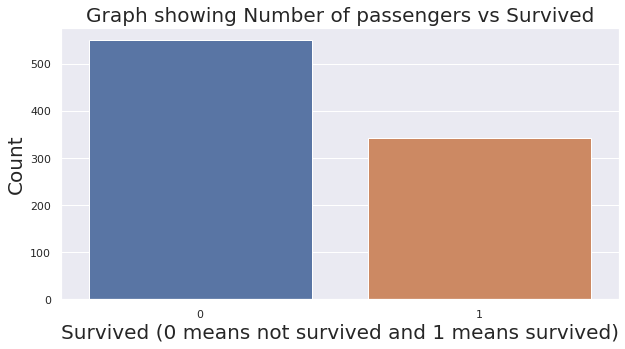

In [6]:
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
sns.countplot(x='Survived', data = training_data)
plt.xlabel('Survived (0 means not survived and 1 means survived)', fontsize=20)
plt.ylabel('Count', fontsize=20)

plt.title('Graph showing Number of passengers vs Survived', fontsize = 20)

Text(0.5, 1.0, 'Graph showing Survival based on sex')

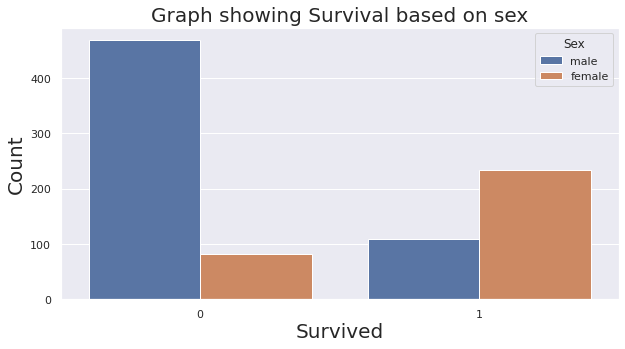

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(x= 'Survived', hue = 'Sex', data = training_data)
plt.xlabel('Survived', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Graph showing Survival based on sex', fontsize = 20)

Text(0.5, 1.0, 'Graph showing Survival based on Passenger class')

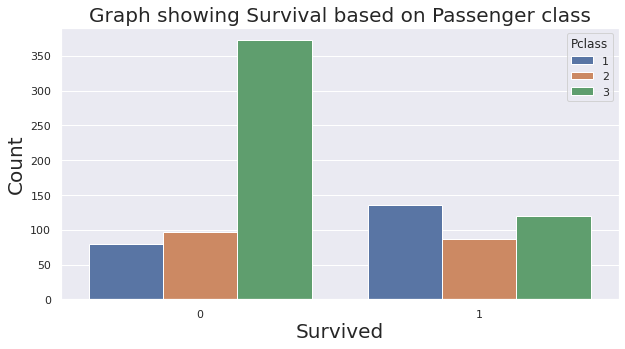

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(x= 'Survived', hue = 'Pclass', data = training_data)
plt.xlabel('Survived', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Graph showing Survival based on Passenger class', fontsize = 20)

Text(0.5, 1.0, 'Distribution of Age in the training dataset')

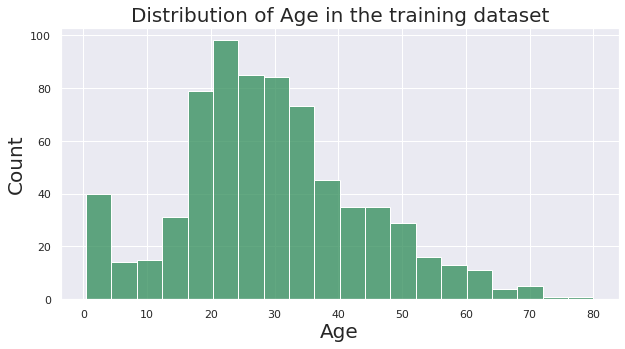

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(data = training_data.Age, color = 'seagreen')
plt.xlabel('Age', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Distribution of Age in the training dataset', fontsize = 20)

Text(0.5, 1.0, 'Graph showing siblings or spouses vs count distribution')

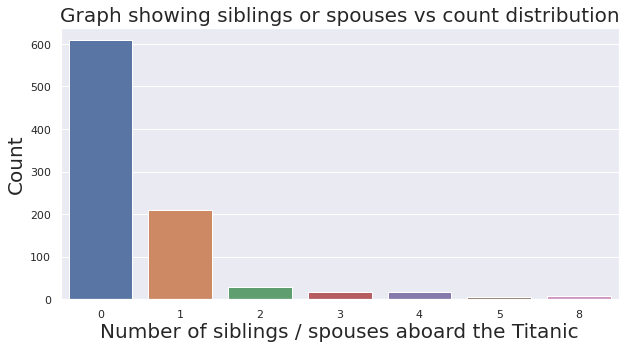

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x= 'SibSp', data = training_data)
plt.xlabel('Number of siblings / spouses aboard the Titanic', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Graph showing siblings or spouses vs count distribution', fontsize = 20)

Text(0.5, 1.0, 'Graph showing distribution of parents or children vs count')

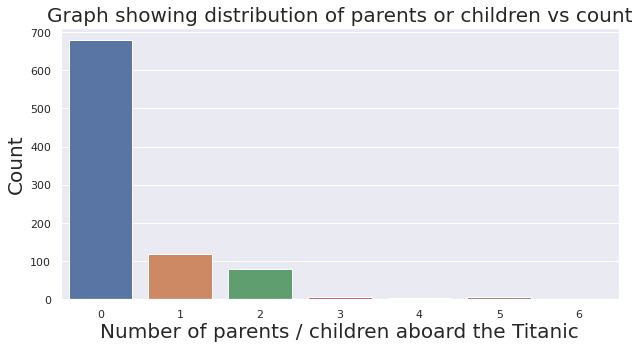

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x= 'Parch', data = training_data)
plt.xlabel('Number of parents / children aboard the Titanic', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Graph showing distribution of parents or children vs count', fontsize = 20)

Text(0, 0.5, 'Age')

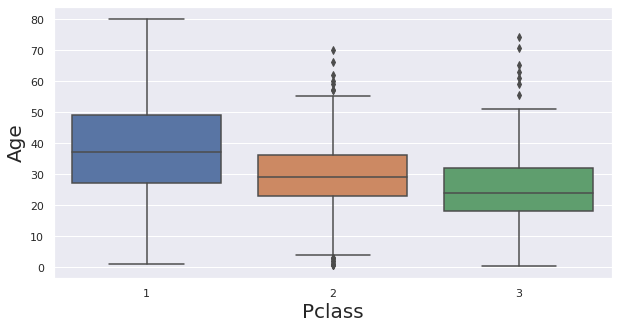

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'Pclass', y = 'Age', data = training_data)
plt.xlabel('Pclass', fontsize=20)
plt.ylabel('Age', fontsize=20)

In [13]:
training_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Let's perform data munging otherwise known as data wrangling on our dataset

<AxesSubplot:>

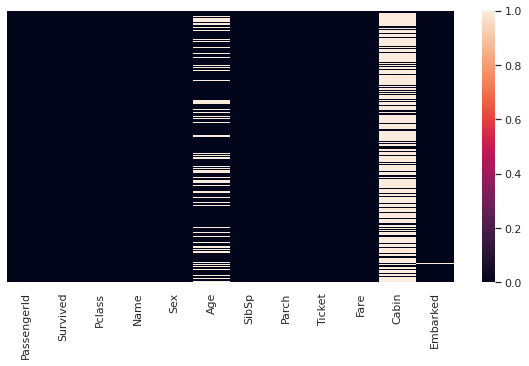

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(training_data.isnull(), yticklabels = False)

In [15]:
training_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that some columns have null values in them. We need to clean our dataset in order for us to perform further analysis.
We do not need the Cabin column for our analysis so, we will drop it from our dataset.

In [16]:
training_data.drop('Cabin', axis = 1, inplace = True)

In [17]:
training_data.dropna(inplace = True)

<AxesSubplot:>

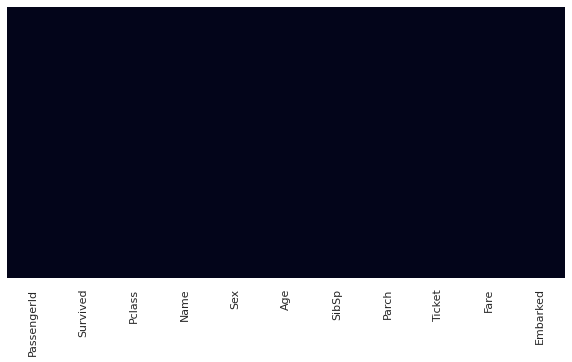

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(training_data.isnull(), yticklabels = False, cbar = False)

In [19]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


We can see that our dataset has a lot of string values which needs to be converted into categorical values so that we can build our prediction model. Whenever we apply machine learing, we need to make sure that our dataset does not have any string values.

In [20]:
pclass = pd.get_dummies(training_data.Pclass, drop_first = True)

In [21]:
sex = pd.get_dummies(training_data.Sex, drop_first = True)

In [22]:
embark = pd.get_dummies(training_data.Embarked, drop_first = True)

In [23]:
training_data = pd.concat([training_data, pclass, sex, embark], axis = 1)
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,2,3,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,1,0,1


Now we do not need columns such as Pclass, Sex and Embarked so, we will remove these columns from our dataset.

In [24]:
training_data.drop(['PassengerId', 'Pclass', 'Sex', 'Name', 'Ticket', 'Embarked'], axis = 1, inplace = True)

In [25]:
training_data.head()

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [26]:
X_train = training_data.drop('Survived', axis = 1)
y_train = training_data.Survived

In [27]:
X_train.head()

,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,22.0,1,0,7.2500,0,1,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,1,0,0,1
3,35.0,1,0,53.1000,0,0,0,0,1
4,35.0,0,0,8.0500,0,1,1,0,1


Importing our testing dataset

In [28]:
test_data = pd.read_csv('../input/titanic/test.csv')
test_data1 = test_data

In [29]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Removing the cabin column from our testing dataset.

In [30]:
test_data.drop('Cabin', axis = 1, inplace = True)

In [31]:
test_data.Age = test_data.Age.fillna(test_data.Age.mean())
test_data.Fare = test_data.Fare.fillna(test_data.Fare.mean())


In [32]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Converting our string values into categorical data.

In [33]:
pclass1 = pd.get_dummies(test_data.Pclass, drop_first = True)
sex1 = pd.get_dummies(test_data.Sex, drop_first = True)
embark1 = pd.get_dummies(test_data.Embarked, drop_first = True)

In [34]:
test_data = pd.concat([test_data, pclass1, sex1, embark1], axis = 1)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,2,3,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,1,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,0,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,1,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,1,0,0,1


In [35]:

test_data.drop(['PassengerId', 'Pclass', 'Sex', 'Name', 'Ticket', 'Embarked'], axis = 1, inplace = True)

In [36]:
test_data1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [37]:
X_test = test_data

## Building our Logistic Regression model.

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model = LogisticRegression(solver='liblinear')

In [40]:
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [41]:
predictions = model.predict(X_test)

In [42]:
output = pd.DataFrame({'PassengerId': test_data1.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
